In [1]:
import os
import iofun.wrappers as wrappers
from tools.utils import interpolate_nans
from tools.viz import visualize_results
from tools.flowcalc import calc_rigid_and_nonrigid_flow


In [2]:
%matplotlib inline
 
op = os.path

# You may need to change this!

In [3]:
base_dir = '.' # Path to your installation directory


# Basic parameters

* Where are the data stored?
* What frames should be shown?
* What movie should be used?

There is no need to change any of this for the demo.

In [4]:
# Keep arguments in separate dictionaries to loop over
examples = {
    'sintel': {
        'dataset': 'sintel',
        'data_dir': op.join(base_dir, 'stimuli/sintel'),
        'mov_name': 'mountain_1',
        'frame1_num': 30,
    },
    'spring': {
        'dataset': 'spring',
        'data_dir': op.join(base_dir, 'stimuli/spring/train'),
        'mov_name': '0001',
        'frame1_num': 10,
    },
    'kubric': {
        'dataset': 'kubric',
        'data_dir': op.join(base_dir, 'stimuli/kubric'),
        'mov_name': 'video_out_0000',
        'frame1_num': 20,
    },
    'monkaa': {
        'dataset': 'monkaa',
        'data_dir': op.join(base_dir, 'stimuli/monkaa'),
        'mov_name': 'treeflight_x2',
        'frame1_num': 300,
    }
}

monkaa
ext 501
replacing nans in optical flow map ...
no nans found in input!
replacing nans in depth1 map ...
no nans found in input!
replacing nans in depth2 map ...
no nans found in input!
mean optical flow magnitude         : 7.8898
mean rigid optical flow magnitude   : 7.8897
mean nonrigid optical flow magnitude: 0.0030


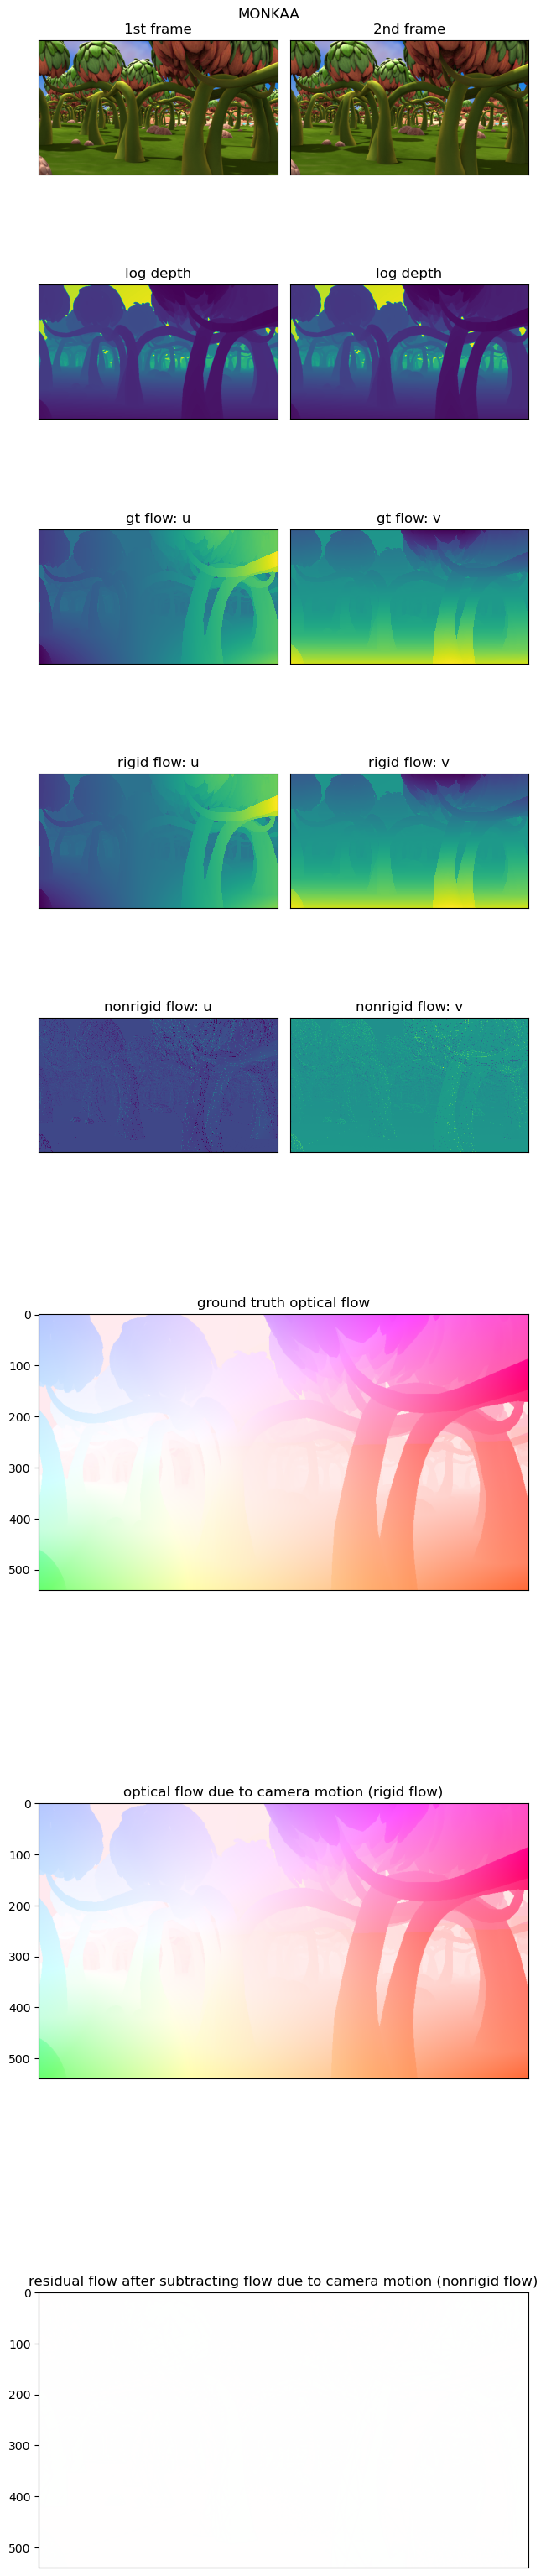

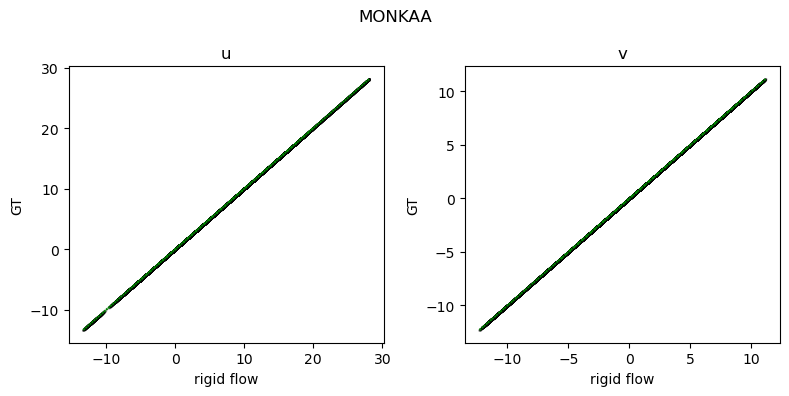

In [5]:
ds_names = ['sintel', 'spring', 'kubric', 'monkaa']

for ds in ds_names:
    print(ds)
    rgb1, rgb2 = wrappers.get_rgb(**examples[ds])
    depth1, depth2 = wrappers.get_depth(**examples[ds])
    cam1, cam2 = wrappers.get_camera(**examples[ds]) 
    flow = wrappers.get_flow(**examples[ds])

    # replace nans
    print('replacing nans in optical flow map ...')
    flow = interpolate_nans(flow)

    print('replacing nans in depth1 map ...')
    depth1 = interpolate_nans(depth1)

    print('replacing nans in depth2 map ...')
    depth2 = interpolate_nans(depth2)

    rig_flo, nonrig_flo = calc_rigid_and_nonrigid_flow((depth1, depth2),
    (cam1, cam2), flow, rgb1.shape[:2])
    visualize_results((rgb1, rgb2), (depth1, depth2), flow, rig_flo,
    nonrig_flo, ds)
